### 1. Definição do Problema:

Esse notebook analisa as equipes finalistas das copas do mundo de futebol da FIFA, entre 1930 e 2018. Os dados foram obtidos no Keaglle (https://www.kaggle.com/abecklas/fifa-world-cup ), compreendendo o período de 1930 até 2014. Esses dados foram compilados no ano de 2018, mesmo ano em que aconteceu a Copa do Mundo Fifa na Rússia. A ideia do desafio do Keaglle é que algum competidor seja capaz de criar um modelo de machine learning que forneça uma estimativa do vencedor da copa de 2018, usando esse data set e outros dois que também estão disponíveis site do desafio.

Como estamos em 2021, sabemos bem que a campeã naquele ano foi a França, que fez a final com a Croácia. A equipe que ficou com o terceiro lugar foi a Bélgica (eliminou o Brasil nas quartas de final) e ganhou a disputa com a Inglaterra.

Dessa forma, vou adicionar essas informações ao data set, fazendo com que o tamanho da amostra seja de 21 observações. Obviamente não é um "Big Data", mas a finalidade aqui é exercitar o Python e a análise de dados com o Pandas.

### 2. Importação e limpeza dos Dados :

No site do Keaglle temos 3 arquivos CSV. O primeiro é o "WorldCupMatches.csv", que contém as informações sobre todos os jogos disputados em todas as partidas das copas do mundo, desde 1930. O segundo arquivo é o "WorldCupPlayers.csv" que contém informações sobre as equipes que participaram dos torneios. E o terceiro arquivo é "WorldCups.csv", que tem informações consolidadas sobre as copas do mundo e seus quatro finalistas. É com esse terceiro arquivo que vou trabalhar aqui.

In [1]:
# Vou listar os arquivos e sua localização na minha máquina, considerando a subpasta onde eu os salvei.
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\WorldCupMatches.csv
input\WorldCupPlayers.csv
input\WorldCups.csv


In [2]:
# Vou trabalhar com quatro pacotes. Dois para manipulação de dados, Pandas e Numpy, 
# mas a ideia aqui é exercitar o Pandas. Utilizo os outros dois pacotes para análise gráfica.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Criando o data frame. Lembrando que este data frame não tem as informações 
# da última copa do mundo, que serão adicionadas posteriormente.
dfCups = pd.read_csv('input/WorldCups.csv')

### Descrição das variáveis que compõe o data frame

#### dfCups
* Year = Ano em que aconteceu a copa do mundo
* Country = País sede da copa
* Winner = Campeão
* Runners-Up = Vice campeão
* Third = Terceiro colocado
* Fourth = Quarto colocado
* GoalsScored = Gols marcados durante a copa
* QualifiedTeams = Total de equipes participantes
* MatchesPlayed = Total de partidas disputadas na copa
* Attendance = Público total da copa

In [4]:
dfCups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [5]:
dfCups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

### Manipulando os dados

Primeiramente preciso incluir os dados da copa de 2018. Depois eu corrijo algumas informações que aparecem truncadas no data set. Alemanha por exemplo, até 1988 aparecia como Germany e Germany FR, porque tínhamos Alemanha Ocidental e Alemanha Oriental.

Feito isso posso partir para a análise dos dados.

In [6]:
# Vou copiar o data set para mantar os dados originais armazenados. 
# Assim posso fazer toda a manipulação diretamente na cópia.
dfCups1 = dfCups.copy()

In [7]:
# Adicionando a linha com os dados da Copa de 2018.
dfCups1 = dfCups1.append({'Year':'2018', 'Country':'Russia', 'Winner':'France', 'Runners-Up':'Croatia', 'Third':'Belgium', 'Fourth':'England', 'GoalsScored':'157', 'QualifiedTeams': '32', 'MatchesPlayed': '64', 'Attendance': '3.031.768'}, ignore_index=True)
dfCups1

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


Vamos corrigir o nome da Alemanha, apagando a expressão FR. Não vamos fazer isso para a variável 'Country' porque não há necessidade. Devemos fazer isso para 'Winner', 'Runners-Up', 'Third' e 'Fourth'. Começo criando um objeto chamado 'namesCups' e salvando a informação sempre que aparecer 'FR' nas variáveis.

In [8]:
namesCupsW = dfCups1[dfCups1['Winner'].str.contains('Germany FR')]['Winner'].value_counts(); namesCupsW

Germany FR    3
Name: Winner, dtype: int64

In [9]:
namesCupsR = dfCups1[dfCups1['Runners-Up'].str.contains('Germany FR')]['Runners-Up'].value_counts(); namesCupsR

Germany FR    3
Name: Runners-Up, dtype: int64

In [10]:
namesCupsT = dfCups1[dfCups1['Third'].str.contains('Germany FR')]['Third'].value_counts(); namesCupsT

Germany FR    1
Name: Third, dtype: int64

In [11]:
namesCupsF = dfCups1[dfCups1['Fourth'].str.contains('Germany FR')]['Fourth'].value_counts(); namesCupsF

Germany FR    1
Name: Fourth, dtype: int64

In [12]:
# Crio o objeto 'wrongCups' e passo como parâmetro o 'namesCups'.
wrongCupsW = list(namesCupsW.index); wrongCupsW

['Germany FR']

In [13]:
wrongCupsR = list(namesCupsR.index); wrongCupsR

['Germany FR']

In [14]:
wrongCupsT = list(namesCupsT.index); wrongCupsT

['Germany FR']

In [15]:
wrongCupsF = list(namesCupsF.index); wrongCupsF

['Germany FR']

In [16]:
# Crio o objeto 'correctCups', passando como parâmetro o 'namesCups' com a função split 
# sempre que a expressão 'FR' aparecer em 'wrongCups', removendo o 'FR'.
correctCupsW = [namesCupsW.split(' FR')[0] for namesCupsW in wrongCupsW]; correctCupsW

['Germany']

In [17]:
correctCupsR = [namesCupsR.split(' FR')[0] for namesCupsR in wrongCupsR]; correctCupsR

['Germany']

In [18]:
correctCupsT = [namesCupsT.split(' FR')[0] for namesCupsT in wrongCupsT]; correctCupsT

['Germany']

In [19]:
correctCupsF = [namesCupsF.split(' FR')[0] for namesCupsF in wrongCupsF]; correctCupsF

['Germany']

In [20]:
# Agora estou criando uma função para fazer a substituição (correção) dentro do meu data set, 'dfCups1'.
for index, wr in enumerate(wrongCupsW):
    dfCups1 = dfCups1.replace(wrongCupsW[index], correctCupsW[index])

for index, wr in enumerate(wrongCupsR):
    dfCups1 = dfCups1.replace(wrongCupsR[index], correctCupsR[index])

for index, wr in enumerate(wrongCupsT):
    dfCups1 = dfCups1.replace(wrongCupsT[index], correctCupsT[index])

for index, wr in enumerate(wrongCupsF):
    dfCups1 = dfCups1.replace(wrongCupsF[index], correctCupsF[index])

In [21]:
# Se eu olhar novamente cada variável, não devo encontrar a expressão 'FR' junto com 'Germany'.
namesCupsW = dfCups1[dfCups1['Winner'].str.contains('Germany FR')]['Winner'].value_counts(); namesCupsW

Series([], Name: Winner, dtype: int64)

In [22]:
namesCupsR = dfCups1[dfCups1['Runners-Up'].str.contains('Germany FR')]['Runners-Up'].value_counts(); namesCupsR

Series([], Name: Runners-Up, dtype: int64)

In [23]:
namesCupsT = dfCups1[dfCups1['Third'].str.contains('Germany FR')]['Third'].value_counts(); namesCupsT

Series([], Name: Third, dtype: int64)

In [24]:
namesCupsF = dfCups1[dfCups1['Fourth'].str.contains('Germany FR')]['Fourth'].value_counts(); namesCupsF

Series([], Name: Fourth, dtype: int64)

In [25]:
dfCups1

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


Resolvido o problema dos nomes, podemos ver alguns dados interessantes sobre as copas do mundo. Por exemplo, das 21 copas do mundo já realizadas, cinco países foram sede pelo menos duas vezes. Porém, apesar da realização de 21 copas, apenas 16 países sediaram copas do mundo.

In [26]:
len(dfCups1)

21

### 3. Análise Exploratória dos Dados

Cinco países sediaram a copa do mundo em pelo menos duas oportunidades, entre elas o Brasil, que é a equipe que mais títulos conquistou, e a Alemanha, que é a equipe que mais aparece entre os quatro finalistas em toda a história.

Dos países Sul-Americanos, apenas quatro deles sediaram copas. Além do Brasil, o Uruguai, Chile e Argentina. O México (América do Norte) é outro país Latino Americano que sediou a copa duas vezes.

Ao todo, apenas 16 países sediaram copas do mundo de futebol.

In [27]:
# Países que mais sediaram copas do mundo
country = dfCups1['Country'].value_counts(); country

Brazil          2
Germany         2
France          2
Mexico          2
Italy           2
Chile           1
Uruguay         1
USA             1
South Africa    1
Spain           1
England         1
Argentina       1
Korea/Japan     1
Switzerland     1
Sweden          1
Russia          1
Name: Country, dtype: int64

In [28]:
len(country)

16

O Brasil é a equipe com mais títulos mundiais (5 títulos), seguido pela Alemanha e Itália com 4. Argentina, França e Uruguai tem 2 títulos enquanto Inglaterra e Espanha tem uma conquista cada.

Temos apenas 8 equipes vencedoras, sendo três delas da América do Sul.

In [29]:
# Equipes com mais títulos mundiais
winner = dfCups1['Winner'].value_counts(); winner

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      2
France       2
Spain        1
England      1
Name: Winner, dtype: int64

In [30]:
len(winner)

8

Das dez equipes que foram vice campeãs, a Alemanha chegou 4 vezes nessa posição, seguida pela Holanda (que não tem título mundial) e Argentina com 3 vices cada. 

Das equipes finalistas, Checoslováquia, Hugria, Suécia, Croácia e Holanda até o momento não conseguiram se sagrar campeãs mundiais de futebol.

In [31]:
# Equipes que mais foram vice campeãs
runners_up = dfCups1['Runners-Up'].value_counts(); runners_up

Germany           4
Argentina         3
Netherlands       3
Brazil            2
Czechoslovakia    2
Italy             2
Hungary           2
France            1
Croatia           1
Sweden            1
Name: Runners-Up, dtype: int64

In [32]:
len(runners_up)

10

Ao longo das copas do mundo, tivemos 14 equipes diferentes em terceiro lugar e 16 em quarto lugar. Destaca-se a Alemanha com 4 aparições na terceira colocação e o Uruguai com 3 aparições no quarto lugar.

In [33]:
# Equipes que mais chegaram em terceiro lugar
third = dfCups1['Third'].value_counts(); third

Germany        4
Poland         2
Brazil         2
France         2
Sweden         2
Netherlands    1
Chile          1
USA            1
Croatia        1
Portugal       1
Belgium        1
Turkey         1
Austria        1
Italy          1
Name: Third, dtype: int64

In [34]:
len(third)

14

In [35]:
# Equipes que mais chegaram em quarto lugar
fourth = dfCups1['Fourth'].value_counts(); fourth

Uruguay           3
Brazil            2
England           2
Yugoslavia        2
Netherlands       1
Soviet Union      1
Spain             1
Portugal          1
Bulgaria          1
Germany           1
Belgium           1
France            1
Korea Republic    1
Austria           1
Sweden            1
Italy             1
Name: Fourth, dtype: int64

In [36]:
len(fourth)

16

In [37]:
# Agora vamos separar todos os finalistas de copa do mundo em um único data set.
listFinalist = dfCups1.iloc[:, 2:6]

Apenas por curiosidade, vou listar as estatísticas descritivas do data set. Ele mostra que temos 8 equipes únicas campeãs, 10 equipes únicas vice campeãs, 14 equipes únicas na terceira colocação e 16 na quarta colocação.

Outra estatística apresentada é qual a equipe que aparece mais vezes em cada colocação. Nesse caso o Brasil é a equipe com maior números de títulos, a Alemanha é a que mais aparece na segunda e terceira colocações e o Uruguai é a que mais aparece em quarto lugar.

In [38]:
listFinalist.describe()

,Winner,Runners-Up,Third,Fourth
count,21,21,21,21
unique,8,10,14,16
top,Brazil,Germany,Germany,Uruguay
freq,5,4,4,3


Vou concatenar os quatro conjuntos de dados criados anteriormente, como exercício, e depois vou fazer uma contagem para ver qual equipe que mais aparece entre os finalistas.

In [39]:
df_concat = pd.concat([winner, runners_up, third, fourth], axis = 1)

In [40]:
df_concat

,Winner,Runners-Up,Third,Fourth
Brazil,5.0,2.0,2.0,2.0
Italy,4.0,2.0,1.0,1.0
Germany,4.0,4.0,4.0,1.0
Argentina,2.0,3.0,NaN,NaN
Uruguay,2.0,NaN,NaN,3.0
France,2.0,1.0,2.0,1.0
Spain,1.0,NaN,NaN,1.0
England,1.0,NaN,NaN,2.0
Netherlands,NaN,3.0,1.0,1.0
Czechoslovakia,NaN,2.0,NaN,NaN


O problema é que ao fazer isso, quando a equipe não figura em uma determinada colocação é gerado um valor NaN. Esse problema é superado com o 'fillna()'.

In [41]:
df_concat.update(df_concat['Winner'].fillna(0))
df_concat.update(df_concat['Runners-Up'].fillna(0))
df_concat.update(df_concat['Third'].fillna(0))
df_concat.update(df_concat['Fourth'].fillna(0))

In [42]:
df_concat

,Winner,Runners-Up,Third,Fourth
Brazil,5.0,2.0,2.0,2.0
Italy,4.0,2.0,1.0,1.0
Germany,4.0,4.0,4.0,1.0
Argentina,2.0,3.0,0.0,0.0
Uruguay,2.0,0.0,0.0,3.0
France,2.0,1.0,2.0,1.0
Spain,1.0,0.0,0.0,1.0
England,1.0,0.0,0.0,2.0
Netherlands,0.0,3.0,1.0,1.0
Czechoslovakia,0.0,2.0,0.0,0.0


Agora eu posso acrescentar uma coluna 'Total' e apresentar a soma das vezes em que a equipe chegou na fase final das copas.

In [43]:
df_concat['Total'] = df_concat.sum(axis=1)

A Alemanha é a equipe que mais apareceu na fase final das Copas do Mundo Fifa. O Brasil é a segunda equipe que mais apareceu enquanto o terceiro lugar fica com a Itália. Dos demais Sul-Americanos, Uruguai e Argentina apareceram 5 vezes cada e o Chile apareceu uma única vez.

In [44]:
df_concat.sort_values('Total', ascending=False)

,Winner,Runners-Up,Third,Fourth,Total
Germany,4.0,4.0,4.0,1.0,13.0
Brazil,5.0,2.0,2.0,2.0,11.0
Italy,4.0,2.0,1.0,1.0,8.0
France,2.0,1.0,2.0,1.0,6.0
Netherlands,0.0,3.0,1.0,1.0,5.0
Argentina,2.0,3.0,0.0,0.0,5.0
Uruguay,2.0,0.0,0.0,3.0,5.0
Sweden,0.0,1.0,2.0,1.0,4.0
England,1.0,0.0,0.0,2.0,3.0
Czechoslovakia,0.0,2.0,0.0,0.0,2.0


Vamos fazer mais algumas análises, agora com os dados numéricos (número de gols, quantidades de equipes, partidas disputadas e público total da copa.

In [45]:
# Primeiro vou copiar o data set para um novo, 
# a fim de preservar as alterações feitas até agora e poder treinar outras manipulações.
dfCups2 = dfCups1.copy()

O grande problema é que os dados numéricos estranhamente não estão apresentando as estatísticas corretamente. Aparentemente esses dados não são numéricos. Por isso primeiro vou converter as colunas em numérico para depois verificar as estatísticas descritivas.

A média de gols em uma copa do mundo é de 120,76 por competição, tendo uma amplitude grande, entre 70 e 171. Essa amplitude larga se deve ao fato de que ao longo das copas a quantidade de equipes participantes e jogos disputados variou consideravelmente, influenciando essa estatística calculada e as outras como veremos adiante.

In [46]:
dfCups2['GoalsScored'] = pd.to_numeric(dfCups2['GoalsScored'])
dfCups2['GoalsScored'].describe()

count     21.000000
mean     120.761905
std       33.193229
min       70.000000
25%       89.000000
50%      126.000000
75%      146.000000
max      171.000000
Name: GoalsScored, dtype: float64

A primeira copa do mundo tinha apenas 13 participantes e a partir de 1998 passou a contar com 32 participantes.

In [47]:
dfCups2['QualifiedTeams'] = pd.to_numeric(dfCups2['QualifiedTeams'])
dfCups2['QualifiedTeams'].describe()

count    21.000000
mean     21.761905
std       7.462605
min      13.000000
25%      16.000000
50%      16.000000
75%      32.000000
max      32.000000
Name: QualifiedTeams, dtype: float64

Da mesma forma como a quantidade de equipes participantes evoluiu ao longo do tempo, consequentemente a quantidade de jogos disputados também se alterou. Na primeira copa do mundo tivemos apenas 17 jogos disputados. A partir de 1998 passamos a ter 64 jogos em cada competição.

In [48]:
dfCups2['MatchesPlayed'] = pd.to_numeric(dfCups2['MatchesPlayed'])
dfCups2['MatchesPlayed'].describe()

count    21.000000
mean     42.857143
std      17.467930
min      17.000000
25%      32.000000
50%      38.000000
75%      64.000000
max      64.000000
Name: MatchesPlayed, dtype: float64

Como a coluna 'Attendace' é um dtype object, e eu quero numérico, e tem pontos separando os milhares, utilizo o comando abaixo pra converter e transformar os pontos em vírgula (milhar separado por vírgula ao invés de pontos).

In [49]:
dfCups2['Attendance'] = pd.to_numeric(dfCups2['Attendance'].str.replace('.',''))

In [50]:
dfCups2['Attendance'].describe()

count    2.100000e+01
mean     1.928067e+06
std      1.074875e+06
min      3.630000e+05
25%      8.931720e+05
50%      1.865753e+06
75%      2.785100e+06
max      3.587538e+06
Name: Attendance, dtype: float64

O problema é que o resultado é um dtype float64, com números científicos. Pra remover essa formatação eu uso a função abaixo.

Com isso podemos ver que o público médio é de quase 2 milhões de pessoas, variando entre 363 mil (copa da Itália em 1934) até 3.587 mil (copa dos Estados Unidos em 19940.

In [51]:
dfCups2["Attendance"].describe().apply(lambda x: format(x, ',.2f'))

count           21.00
mean     1,928,067.38
std      1,074,875.09
min        363,000.00
25%        893,172.00
50%      1,865,753.00
75%      2,785,100.00
max      3,587,538.00
Name: Attendance, dtype: object

### Análise gráfica

Vou adicionar alguns gráficos apenas como exercício, para ter uma opção visual dos resultados discutidos acima, usando para isso o pacote Seaborn.

Text(0.5, 1.0, 'Total e público nos estádios por ano')

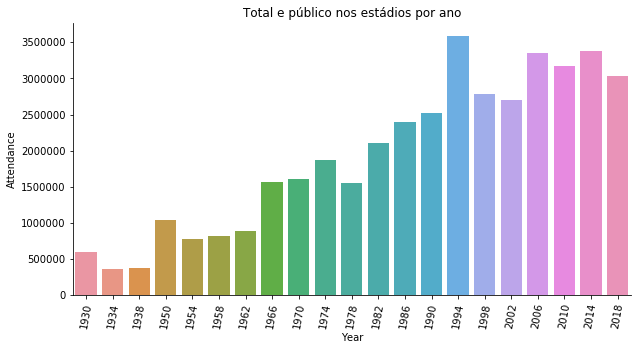

In [52]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = dfCups2)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Total e público nos estádios por ano')

Text(0.5, 1.0, 'Quantidade de equipes classificadas para a copa do mundo por ano')

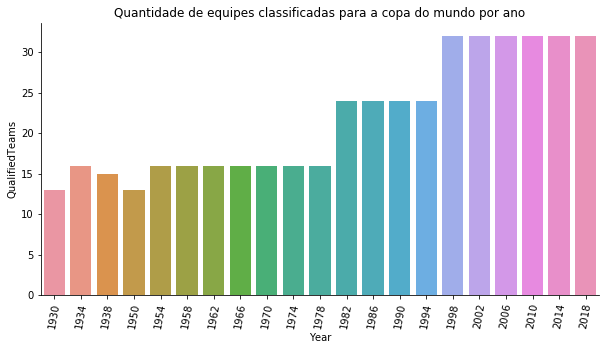

In [53]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = dfCups2)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Quantidade de equipes classificadas para a copa do mundo por ano')

Text(0.5, 1.0, 'Gols marcados por ano')

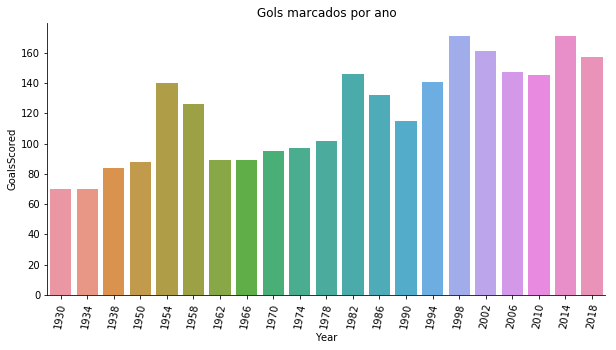

In [54]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = dfCups2)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Gols marcados por ano')

Text(0.5, 1.0, 'Jogos disputados por ano')

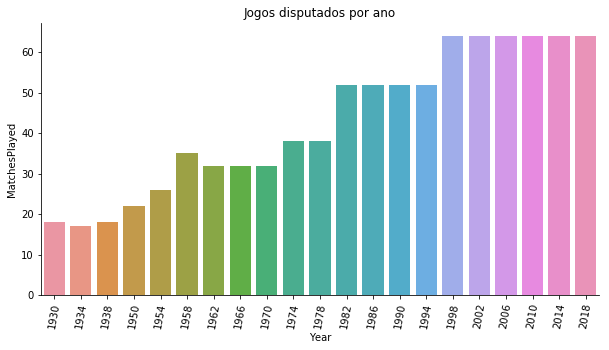

In [55]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = dfCups2)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Jogos disputados por ano')

### 4. Conclusão

O objetivo deste notebook é exercitar o Python, espcialmente a análise de dados com o Pandas. Para isso usei dados das copas do mundo organizados pela FIFA, disponível no site do Keaglle. A ideia principal é exercitar manipulação de dados, encontrar soluções para os problemas que surgem durante o processo de análise e publicar no portfólio do Github.